# --- Day 5: Hydrothermal Venture ---

## Part 1

You come across a field of hydrothermal vents on the ocean floor! These vents constantly produce large, opaque clouds, so it would be best to avoid them if possible.

They tend to form in lines; the submarine helpfully produces a list of nearby lines of vents (your puzzle input) for you to review. For example:

```
0,9 -> 5,9
8,0 -> 0,8
9,4 -> 3,4
2,2 -> 2,1
7,0 -> 7,4
6,4 -> 2,0
0,9 -> 2,9
3,4 -> 1,4
0,0 -> 8,8
5,5 -> 8,2
```

Each line of vents is given as a line segment in the format x1,y1 -> x2,y2 where x1,y1 are the coordinates of one end the line segment and x2,y2 are the coordinates of the other end. These line segments include the points at both ends. In other words:

```
    An entry like 1,1 -> 1,3 covers points 1,1, 1,2, and 1,3.
    An entry like 9,7 -> 7,7 covers points 9,7, 8,7, and 7,7.
```

For now, **only consider horizontal and vertical lines**: lines where either x1 = x2 or y1 = y2.

So, the horizontal and vertical lines from the above list would produce the following diagram:

```
.......1..
..1....1..
..1....1..
.......1..
.112111211
..........
..........
..........
..........
222111....
```

In this diagram, the top left corner is 0,0 and the bottom right corner is 9,9. Each position is shown as **the number of lines which cover that point** or `.` if no line covers that point. The top-left pair of 1s, for example, comes from 2,2 -> 2,1; the very bottom row is formed by the overlapping lines 0,9 -> 5,9 and 0,9 -> 2,9.

To avoid the most dangerous areas, you need to determine **the number of points where at least two lines overlap**. In the above example, this is anywhere in the diagram with a 2 or larger - a total of 5 points.

Consider only horizontal and vertical lines. At how many points do at least two lines overlap?


In [1]:
import numpy as np

In [2]:
def get_coordinates(messy_coords):
    """
    Return a list of lists which contain tuples
    of coordinates for the vents.
    """
    clean_inputs = []
    for line in messy_coords:
        onesplit = line.split(" -> ")
        twosplit = [eval(nums) for nums in onesplit][:]
        clean_inputs.append(twosplit)
    return clean_inputs

def get_matrix_board(clean_inputs):
    """
    Return a matrix of zeros as our board to work with.
    """
    max_yval = 1 + max(
            max(clean_inputs, key=lambda x: x[0][0])[0][0],
            max(clean_inputs, key=lambda x: x[1][0])[1][0]
        )


    max_xval = 1 + max(
        max(clean_inputs, key=lambda x: x[0][1])[0][1],
        max(clean_inputs, key=lambda x: x[1][1])[1][1]
    )
    return np.zeros(shape = (max_xval, max_yval))

def get_num_overlaps(clean_inputs, matrix):
    for coords in clean_inputs:
        y1 = coords[0][0]
        x1 = coords[0][1]
        y2 = coords[1][0]
        x2 = coords[1][1]

        lowx = min(x1,x2)
        highx = max(x1,x2)

        lowy = min(y1,y2)
        highy = max(y1,y2)

        if lowx == highx:
            for y in range(lowy, highy+1):
                matrix[lowx, y] += 1

        elif lowy == highy:
            for x in range(lowx, highx+1):
                matrix[x, lowy] += 1
    
    xs,_ = np.where(matrix > 1)
    return len(xs)

In [3]:
test_input = [
    "0,9 -> 5,9",
    "8,0 -> 0,8",
    "9,4 -> 3,4",
    "2,2 -> 2,1",
    "7,0 -> 7,4",
    "6,4 -> 2,0",
    "0,9 -> 2,9",
    "3,4 -> 1,4",
    "0,0 -> 8,8",
    "5,5 -> 8,2"
]

known_answer = 5

clean_inputs = get_coordinates(test_input)
matrix = get_matrix_board(clean_inputs)
myanswer = get_num_overlaps(clean_inputs, matrix)

if myanswer == known_answer:
    print("Looks like its working!!")
else:
    print("There is something wrong... :(")

Looks like its working!!


In [4]:
data_file = "../data/05_data.txt"

with open(data_file, "r") as f:
    puzzle_input = [line.rstrip('\n') for line in f]

In [5]:
clean_inputs = get_coordinates(puzzle_input)
matrix = get_matrix_board(clean_inputs)
get_num_overlaps(clean_inputs, matrix)

8060

## Part Two

Unfortunately, considering only horizontal and vertical lines doesn't give you the full picture; you need to also consider diagonal lines.

Because of the limits of the hydrothermal vent mapping system, the lines in your list will only ever be horizontal, vertical, or a diagonal line at exactly 45 degrees. In other words:

    An entry like 1,1 -> 3,3 covers points 1,1, 2,2, and 3,3.
    An entry like 9,7 -> 7,9 covers points 9,7, 8,8, and 7,9.

Considering all lines from the above example would now produce the following diagram:

```
1.1....11.
.111...2..
..2.1.111.
...1.2.2..
.112313211
...1.2....
..1...1...
.1.....1..
1.......1.
222111....
```

You still need to determine the number of points where at least two lines overlap. In the above example, this is still anywhere in the diagram with a 2 or larger - now a total of 12 points.

Consider all of the lines. At how many points do at least two lines overlap?


### The only thing that needs to change here is the `get_num_overlaps` function, which now needs to incorporate diagonals....

In [6]:
def get_num_overlaps_w_diag(clean_inputs, matrix):
    for coords in clean_inputs:
        y1 = coords[0][0]
        x1 = coords[0][1]
        y2 = coords[1][0]
        x2 = coords[1][1]

        lowx = min(x1,x2)
        highx = max(x1,x2)

        lowy = min(y1,y2)
        highy = max(y1,y2)
        
        # Vertical moves
        if lowx == highx:
            for y in range(lowy, highy+1):
                matrix[lowx, y] += 1
        
        # Horizontal moves
        elif lowy == highy:
            for x in range(lowx, highx+1):
                matrix[x, lowy] += 1
        
        # Diagonal moves
        else:
            if x1 > x2:  # Count down
                x_vals = [x for x in range(x1, x2-1, -1)]
            else:
                x_vals = [x for x in range(x1, x2+1)]

            if y1 > y2:  # Count down
                y_vals = [y for y in range(y1, y2-1, -1)]
            else:
                y_vals = [y for y in range(y1, y2+1)]
            
            # Increment by one
            coordinate_zipper = zip(x_vals, y_vals)
            for x,y in coordinate_zipper:
                matrix[x, y] += 1
    
    xs,_ = np.where(matrix > 1)
    return matrix, len(xs)

In [7]:
known_answer = 12

clean_inputs = get_coordinates(test_input)
matrix = get_matrix_board(clean_inputs)
mat, myanswer = get_num_overlaps_w_diag(clean_inputs, matrix)

if myanswer == known_answer:
    print("Looks like its working!!")
else:
    print("There is something wrong... :(")

Looks like its working!!


### Try again with the puzzle input...

In [8]:
clean_inputs = get_coordinates(puzzle_input)
matrix = get_matrix_board(clean_inputs)
mat, answer = get_num_overlaps_w_diag(clean_inputs, matrix)
print(answer)

21577


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
frame = pd.DataFrame(mat)

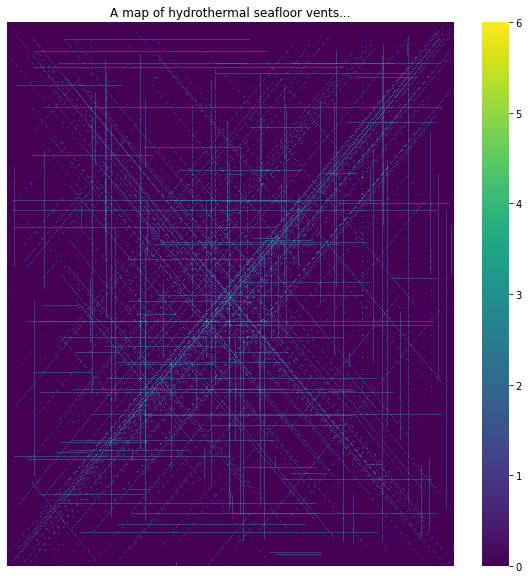

In [12]:
plt.figure(figsize=(10,10))
plt.title("A map of hydrothermal seafloor vents...")

sns.heatmap(mat, cmap="viridis")

_ = plt.xticks([])
_ = plt.yticks([])
